<a href="https://colab.research.google.com/github/yangtianchangxiao/Dissertation-project-in-Bristol/blob/main/Generate_Visible_Environment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np


48
96
144
192
240
288
336
384
432
480
528
576
624
672
720
768
816
864
912
960
1008
1056
1104
1152
1200
1248
1296
1344
1392
1440
1488
1536
1584
1632
1680
1728
1776
1824
1872
1920
1968
2016
2064
2112
2160
2208
2256
2304
2352
2400
2400  is data_size.
50


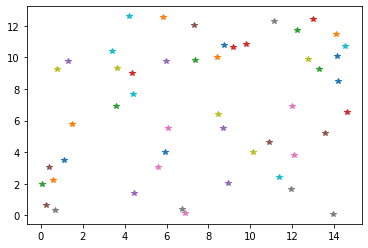

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

group_size = 8

epoch = 50

area_width = 15
area_height = 13
block_num = 5
max_block_width = 1.2
max_block_height = 1.7
block_parameters=np.zeros((6,block_num))
influence_gain = 1.2 # Set danger area around a block. If a block is 1.3*1.4 size with a center (2.3,2.4),
            # then the danger area is (1.2*1.3)*(1.2*1.4) size with the same center (2.3,2.4).
block_influence_range_parameters=np.zeros((6,block_num))
targets_num = 1
targets_location = np.zeros((2,targets_num))
initiate_data_list = []
initiate_robots_list = []

def generate_block():
  global block_parameters, block_influence_range
  for i in range(block_num):
    #initiate x and y coordinates of block_cneter 
    block_parameters[0][i] = np.random.random()*(area_width - max_block_width) # 这种生成block center 的方法有一个缺点，就是block center 生成区域范围缩小了，本来应该是整个area, 
                                    #可以改成整个区域，然后对block center + x/y interval施加约束，使其不超过整个区域
    block_parameters[1][i] = np.random.random()*(area_height - max_block_height)
    block_influence_range_parameters[0][i] = block_parameters[0][i]
    block_influence_range_parameters[1][i] = block_parameters[1][i]
    
    x_interval = np.random.random()*max_block_width # Set x interval of left and right boundary from block center
    for j in range(2,4): # x interval of left and right boundary from block center
      block_parameters[j][i] = x_interval
      block_influence_range_parameters[j][i] = influence_gain*block_parameters[j][i]
      
    y_interval = np.random.random()*max_block_height # Set y coordinates of up and down boundary from block center
    for j in range(4,6): # y coordinates of up and down boundary from block center
      block_parameters[j][i] = y_interval
      block_influence_range_parameters[j][i] = influence_gain*block_parameters[j][i]
      #print(block_parameters[j][i])
    for m in range(6):
      initiate_data_list.append(block_parameters[m][i])
  #print('block_parameters length is',len(initiate_data_list))
def plot_block(parameters):
  global fig
  fig = plt.figure()
  for i in range(block_num):
    x = [parameters[0][i]-parameters[2][i], parameters[0][i]+parameters[3][i]] #coordiantes of left and right boundary of blocks
    y = [parameters[1][i]-parameters[4][i], parameters[1][i]+parameters[5][i]] #coordiantes of down and up boundary of blocks
    coordinates = [(x[0],y[0]),#left bottom
    (x[0],y[1]),#left top
    (x[1],y[1]),#right top 
    (x[1],y[0]),#right bottom
    (x[0],y[0])# ignored
    ]
    codes = [Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,]
    path = Path(coordinates, codes)
    patch = patches.PathPatch(path, facecolor='orange', lw=2)
    ax = fig.add_subplot(111)
    ax.axis('equal')
    ax.add_patch(patch)

def plot_danger_area(parameters):
  global fig
  for i in range(block_num):
    x = [parameters[0][i]-parameters[2][i], parameters[0][i]+parameters[3][i]] #coordiantes of left and right boundary of blocks
    y = [parameters[1][i]-parameters[4][i], parameters[1][i]+parameters[5][i]] #coordiantes of down and up boundary of blocks
    coordinates = [(x[0],y[0]),#left bottom
    (x[0],y[1]),#left top
    (x[1],y[1]),#right top 
    (x[1],y[0]),#right bottom
    (x[0],y[0])# ignored
    ]
    codes = [Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,]
    path = Path(coordinates, codes)
    patch = patches.PathPatch(path, color = None,facecolor = 'None', linestyle ='-', lw=2)
    ax = fig.add_subplot(1,1,1)
    ax.axis('equal')
    ax.add_patch(patch)

def initiate_targets():
  global targets_num, targets_location, fig
  regenate_time = 1
  for i in range(targets_num):
    targets_location[0][i] = np.random.random()*area_width
    targets_location[1][i] = np.random.random()*area_height
    while True:
      for j in range(block_num): # If targets are covoerd by blocks, then we should regerate targets
        x = [block_parameters[0][i]-block_parameters[2][i], block_parameters[0][i]+block_parameters[3][i]] #coordiantes of left and right boundary of blocks
        y = [block_parameters[1][i]-block_parameters[4][i], block_parameters[1][i]+block_parameters[5][i]] #coordiantes of down and up boundary of blocks
        if (x[0]<targets_location[0][i]<x[1] and y[0]<targets_location[1][i]<y[1]): # If targets are coverd by blocks,
          #print("Targts",j,"is coverd by blocks",regenate_time,"times")
          regenate_time = regenate_time + 1
          targets_location[0][i] = np.random.random()*area_width   
          targets_location[1][i] = np.random.random()*area_height
          break # end 'for ' loop and test whether targets are covered by blockd or not, again.
      if j == block_num-1:
        break
    initiate_data_list.append(targets_location[0][i])
    initiate_data_list.append(targets_location[1][i])
    #print('targets length is',len(initiate_data_list))
    plt.plot(targets_location[0][i],targets_location[1][i],'*')
def initiate_group(parameters):
  global group_size
  original_group = group = np.zeros((2,group_size))
  #print(np.shape(group))
  for i in range(group_size):
    x_cat = np.random.uniform(0,area_width)
    y_cat = np.random.uniform(0,area_height)
    #print('x_cat',x_cat,'y_cat',y_cat)
    j = 0
    while j < block_num:
      x_block = [parameters[0][j]-parameters[2][j], parameters[0][j]+parameters[3][j]] #coordiantes of left and right boundary of blocks
      y_block = [parameters[1][j]-parameters[4][j], parameters[1][j]+parameters[5][j]] #coordiantes of down and up boundary of blocks
      if x_block[0]<x_cat<x_block[1] and y_block[0]<y_cat<y_block[1]:
        x_cat=np.random.uniform(0,area_width)
        y_cat=np.random.uniform(0,area_height)
        j = 0
      else:
        j = j + 1
        
    original_group[0][i] = group[0][i] = x_cat
    original_group[1][i] = group[1][i] = y_cat
    initiate_data_list.append(x_cat)
    initiate_data_list.append(y_cat)
  # print(group)
  personal_best_position = group
  #print("shape of group",np.shape(group))
  #print('group length is',len(initiate_data_list))
def store_position_data():
  global initiate_data_list
  data_size = len(initiate_data_list)
  print(data_size,' is data_size.')
  data = np.array(initiate_data_list)
  array_size = (int)(data_size/(6*block_num+2*targets_num+2*group_size))
  print(array_size)
  data = data.reshape((array_size,6*block_num+2*targets_num+2*group_size))
  data_df = pd.DataFrame(data)
  columns = []
  for i in range(block_num):
    columns.append('block_center_x'+str(i))
    columns.append('block_center_y'+str(i))
    columns.append('block_center_left_interval'+str(i))
    columns.append('block_center_right_interval'+str(i))
    columns.append('block_center_down_interval'+str(i))
    columns.append('block_center_up_interval'+str(i))
  columns.append('target_x')
  columns.append('target_y')
  for i in range(group_size):
    columns.append('robot_x'+str(i))
    columns.append('robot_y'+str(i))
  data_df.columns = columns
  #data_df.index = ['a','b','c','d','e','f','g','h','i','j']

  writer = pd.ExcelWriter('Environment.xlsx')
  data_df.to_excel(writer,float_format='%.5f' )
  writer.save()
for i in range(epoch):
  generate_block()
  initiate_targets()
  initiate_group(block_parameters)
  print(len(initiate_data_list))
store_position_data()

# for i in range(5):
#   initiate_targets()
#   plot_block(block_parameters) 
#   plot_danger_area(block_influence_range_parameters) 
#   #plt.show()
#   fig = plt.figure()


In [6]:
# # Demo that generates blocks in a certain area


# from matplotlib.path import Path

# import matplotlib.patches as patches

# verts = [(0., 0.), # left, bottom

# (-1., 1.), # left, top

# (1., 3.), # right, top

# (2., 2.), # right, bottom

# (0., 0.),] # ignored

# codes = [Path.MOVETO,

# Path.LINETO,

# Path.LINETO,

# Path.LINETO,

# Path.CLOSEPOLY,]

# path = Path(verts, codes)

# fig = plt.figure()

# ax = fig.add_subplot(111)

# patch = patches.PathPatch(path, facecolor='orange', lw=2)

# ax.add_patch(patch)

# ax.axis('equal')

# plt.show()